# BiLSTM 12-64.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
#!pip install keras
from statsmodels.tsa.seasonal import seasonal_decompose
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#!pip install keras --user
#!pip install tensorflow --user
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input, Concatenate, GRU,SimpleRNN, Bidirectional
#!pip install tensorflow --user
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Flatten
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Model



In [2]:

from google.colab import files
uploaded = files.upload()

df = pd.read_excel('df_rango_fechas_imputando.xlsx')
df

Saving df_rango_fechas_imputando.xlsx to df_rango_fechas_imputando.xlsx


,date,Madrid,Alcalá de Henares,Alcobendas,Alcorcón,Algete,Alpedrete,Aranjuez,Arganda,Arroyomolinos,...,Vallirana,Vallromanes,Vic,Viladecans,Viladecavalls,Vilafranca del Penedès,Vilanova del Camí,Vilanova del Vallès,Vilanova i la Geltrú,Vilassar de Mar
0,2011-11-01,3105,1850,2589,2127,1739,1849,1643,1685,1609,...,1825,2294,1791,2612,1813.0,1751,1333,2169,2166,2826
1,2011-12-01,3080,1833,2541,2093,1704,1855,1625,1738,1588,...,1790,2272,1692,2574,1699.0,1731,1394,2212,2147,2795
2,2012-01-01,3069,1828,2502,2058,1645,1836,1629,1722,1589,...,1774,2303,1644,2573,1807.0,1708,1322,2176,2127,2744
3,2012-02-01,3047,1824,2520,2052,1657,1825,1621,1687,1597,...,1784,2221,1494,2550,1734.0,1683,1390,2180,2103,2733
4,2012-03-01,3037,1809,2524,2034,1666,1772,1623,1647,1582,...,1760,2260,1371,2520,1731.0,1584,1265,2150,2035,2737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2024-05-01,4473,2224,2956,2371,1798,2062,1632,1943,2006,...,1638,2026,1984,2544,2070.0,1919,1179,1859,2585,3363
151,2024-06-01,4514,2233,2965,2368,1871,2081,1632,1959,2004,...,1661,2045,1988,2520,2043.0,1858,1138,1936,2575,3301
152,2024-07-01,4622,2245,2952,2418,1932,2174,1657,1933,2025,...,1653,1986,1993,2521,2016.0,1850,1143,1925,2565,3316
153,2024-08-01,4717,2241,2975,2470,1992,2222,1682,1974,2052,...,1688,2010,1998,2557,2022.0,1897,1195,2002,2578,3286


In [3]:
# Diccionario de municipios y su comunidad autónoma
comunidades = {
    # Comunidad de Madrid
    "Madrid": "Madrid", "Ajalvir": "Madrid", "Alcalá de Henares": "Madrid", "Alcobendas": "Madrid", "Alcorcón": "Madrid",
    "Aldea del Fresno": "Madrid", "Algete": "Madrid", "Alpedrete": "Madrid", "Aranjuez": "Madrid", "Arganda": "Madrid",
    "Arroyomolinos": "Madrid", "Becerril de la Sierra": "Madrid", "Boadilla del Monte": "Madrid", "Cadalso de los Vidrios": "Madrid",
    "Camarma de Esteruelas": "Madrid", "Campo Real": "Madrid", "Carabaña": "Madrid", "Casarrubuelos": "Madrid", "Cercedilla": "Madrid",
    "Chinchón": "Madrid", "Ciempozuelos": "Madrid", "Ciudalcampo": "Madrid", "Club de Campo": "Madrid", "Cobeña": "Madrid",
    "Collado Mediano": "Madrid", "Collado Villalba": "Madrid", "Colmenar de Oreja": "Madrid", "Colmenar Viejo": "Madrid", "Colmenarejo": "Madrid",
    "Coslada": "Madrid", "Cubas de la Sagra": "Madrid", "Daganzo de Arribas": "Madrid", "El Álamo": "Madrid", "El Boalo": "Madrid",
    "El Escorial": "Madrid", "Eurovillas": "Madrid", "Fuenlabrada": "Madrid", "Fuente del Fresno": "Madrid", "Fuente el Saz de Jarama": "Madrid",
    "Galapagar": "Madrid", "Getafe": "Madrid", "Griñón": "Madrid", "Guadalix de la Sierra": "Madrid", "Guadarrama": "Madrid",
    "Hoyo de Manzanares": "Madrid", "Humanes de Madrid": "Madrid", "Las Rozas de Madrid": "Madrid", "Leganés": "Madrid", "Loeches": "Madrid",
    "Los Santos de la Humosa": "Madrid", "Majadahonda": "Madrid", "Manzanares el Real": "Madrid", "Mejorada del Campo": "Madrid",
    "Miraflores de la Sierra": "Madrid", "Moralzarzal": "Madrid", "Morata de Tajuña": "Madrid", "Móstoles": "Madrid", "Navacerrada": "Madrid",
    "Navalcarnero": "Madrid", "Paracuellos de Jarama": "Madrid", "Parla": "Madrid", "Pedrezuela": "Madrid", "Pelayos de la Presa": "Madrid",
    "Pinto": "Madrid", "Pozuelo de Alarcón": "Madrid", "Quijorna": "Madrid", "Rivas-Vaciamadrid": "Madrid", "Robledo de Chavela": "Madrid",
    "San Agustin de Guadalix": "Madrid", "San Fernando de Henares": "Madrid", "San Lorenzo de el Escorial": "Madrid", "San Martín de la Vega": "Madrid",
    "San Martín de Valdeiglesias": "Madrid", "San Sebastián de los Reyes": "Madrid", "Santo Domingo": "Madrid", "Serranillos del Valle": "Madrid",
    "Sevilla la Nueva": "Madrid", "Soto del Real": "Madrid", "Torrejón de Ardoz": "Madrid", "Torrejón de la Calzada": "Madrid",
    "Torrelaguna": "Madrid", "Torrelodones": "Madrid", "Torres de la Alameda": "Madrid", "Tres Cantos": "Madrid", "Valdemorillo": "Madrid",
    "Valdemoro": "Madrid", "Valdeolmos-Alalpardo": "Madrid", "Valdetorres de Jarama": "Madrid", "Velilla de San Antonio": "Madrid",
    "Villa del Prado": "Madrid", "Villalbilla": "Madrid", "Villanueva de la Cañada": "Madrid", "Villanueva del Pardillo": "Madrid",
    "Villaviciosa de Odón": "Madrid",

    # Bilbao
    "Bilbao": "Bilbao", "Abanto y Ciérvana": "Bilbao", "Alonsotegui": "Bilbao", "Amorebieta-Echano": "Bilbao",
    "Arrigorriaga": "Bilbao", "Astrabudua": "Bilbao", "Bakio": "Bilbao", "Balmaseda": "Bilbao", "Barakaldo": "Bilbao",
    "Basauri": "Bilbao", "Berango": "Bilbao", "Bermeo": "Bilbao", "Berriz": "Bilbao", "Carranza": "Bilbao", "Durango": "Bilbao",
    "Erandio": "Bilbao", "Ermua": "Bilbao", "Etxebarri, Anteiglesia de San esteban": "Bilbao", "Galdakao": "Bilbao", "Gallarta": "Bilbao",
    "Gernika-Lumo": "Bilbao", "Getxo": "Bilbao", "Güeñes": "Bilbao", "Leioa": "Bilbao", "Lemoa": "Bilbao", "Mungia": "Bilbao",
    "Muskiz": "Bilbao", "Ortuella": "Bilbao", "Plenztia": "Bilbao", "Portugalete": "Bilbao", "Santurtzi": "Bilbao", "Sestao": "Bilbao",
    "Sopelana": "Bilbao", "Urduliz": "Bilbao", "Valle de Trapaga-Trapagaran": "Bilbao",

    # Málaga
    "Málaga": "Málaga", "Alameda": "Málaga", "Alcaucín": "Málaga", "Algarrobo": "Málaga", "Algarrobo-Costa": "Málaga",
    "Alhaurín de la Torre": "Málaga", "Alhaurín el Grande": "Málaga", "Almayate Bajo": "Málaga", "Alora": "Málaga", "Antequera": "Málaga",
    "Benagalbon": "Málaga", "Benahavís": "Málaga", "Benajarafe": "Málaga", "Benalmádena": "Málaga", "Caleta de Velez": "Málaga",
    "Campillos": "Málaga", "Cártama": "Málaga", "Casabermeja": "Málaga", "Casares": "Málaga", "Chilches": "Málaga",
    "Coin": "Málaga", "Competa": "Málaga", "Estepona": "Málaga", "Fuengirola": "Málaga", "Manilva": "Málaga",
    "Marbella": "Málaga", "Mijas": "Málaga", "Mollina": "Málaga", "Monda": "Málaga", "Nerja": "Málaga",
    "Ojén": "Málaga", "Pizarra": "Málaga", "Rincón de la Victoria": "Málaga", "Ronda": "Málaga",
    "Torre del Mar": "Málaga", "Torremolinos": "Málaga", "Torrox": "Málaga", "Vélez-Malaga": "Málaga", "Fuente de Piedra": "Málaga",

    # Valencia
    "València": "Valencia", "Alaquás": "Valencia", "Albaida": "Valencia", "Albalat Dels Tarongers": "Valencia",
    "Alberique": "Valencia", "Alcacer": "Valencia", "Aldaia": "Valencia", "Alfafar": "Valencia", "Algemesi": "Valencia",
    "Alginet": "Valencia", "Almarda": "Valencia", "Almussafes": "Valencia", "Alzira": "Valencia", "Bellreguard": "Valencia",
    "Benaguasil": "Valencia", "Benetusser": "Valencia", "Benifaio": "Valencia", "Beniganim": "Valencia", "Benimàmet": "Valencia",
    "Bétera": "Valencia", "Buñol": "Valencia", "Burjassot": "Valencia", "Canals": "Valencia", "Canet d'En Berenguer": "Valencia",
    "Carcaixent": "Valencia", "Carlet": "Valencia", "Casinos": "Valencia", "Catarroja": "Valencia", "Cheste": "Valencia",
    "Chiva": "Valencia", "Cullera": "Valencia", "Daimus": "Valencia", "El Perelló": "Valencia", "El Perellonet": "Valencia",
    "El Saler": "Valencia", "Favara": "Valencia", "Gandia": "Valencia", "Godella": "Valencia", "Godelleta": "Valencia",
    "L'Alcudia": "Valencia", "L'Eliana": "Valencia", "L'Olleria": "Valencia", "La Pobla de Vallbona": "Valencia",
    "Llíria": "Valencia", "Manises": "Valencia", "Massamagrell": "Valencia", "Massanassa": "Valencia", "Miramar": "Valencia",
    "Mislata": "Valencia", "Mogente": "Valencia", "Moncada": "Valencia", "Monserrat": "Valencia", "Montroy": "Valencia",
    "Náquera": "Valencia", "Oliva": "Valencia", "Olocau": "Valencia", "Ontinyent": "Valencia", "Paiporta": "Valencia",
    "Palma de Gandia": "Valencia", "Paterna": "Valencia", "Pedralba": "Valencia", "Picanya": "Valencia", "Picassent": "Valencia",
    "Piles": "Valencia", "Playa de Farnals": "Valencia", "Puçol": "Valencia", "Puerto de Sagunto": "Valencia",
    "Rafelbuñol/Rafelbunyol": "Valencia", "Requena": "Valencia", "Riba-Roja de Túria": "Valencia", "Rocafort": "Valencia",
    "Sagunto/Sagunt": "Valencia", "San Antonio de Benagéber": "Valencia", "Sedavi": "Valencia", "Serra": "Valencia",
    "Sueca": "Valencia", "Tavernes de la Valldigna": "Valencia", "Torrent": "Valencia", "Turis": "Valencia",
    "Vilamarxant": "Valencia", "Villalonga": "Valencia", "Xátiva": "Valencia", "Xeraco": "Valencia", "Xirivella": "Valencia",

    # Barcelona
   "Barcelona": "Barcelona", "Abrera": "Barcelona", "Alella": "Barcelona", "Arenys de Mar": "Barcelona",
    "Arenys de Munt": "Barcelona", "Argentona": "Barcelona", "Badalona": "Barcelona", "Badia del Vallès": "Barcelona",
    "Barberà del Vallès": "Barcelona", "Begues": "Barcelona", "Bigues i Riells": "Barcelona", "Cabrera del Mar": "Barcelona",
    "Cabrils": "Barcelona", "Caldes d'Estrac": "Barcelona", "Caldes de Montbui": "Barcelona", "Catella": "Barcelona",
    "Canet de Mar": "Barcelona", "Canovelles": "Barcelona", "Capellades": "Barcelona", "Cardedeu": "Barcelona",
    "Castellar del Vallès": "Barcelona", "Castellbisbal": "Barcelona", "Castelldefels": "Barcelona", "Centelles": "Barcelona",
    "Cerdanyola del Vallès": "Barcelona", "Cervelló": "Barcelona", "Corbera de Llobregat": "Barcelona",
    "Cornellà de Llobregat": "Barcelona", "Cubelles": "Barcelona", "Dosrius": "Barcelona", "El Masnau": "Barcelona",
    "El Pont de Vilomara i Rocafort": "Barcelona", "El Prat de Llobregat": "Barcelona", "Esparreguera": "Barcelona",
    "Esplugues de Llobregat": "Barcelona", "Gavà": "Barcelona", "Granollers": "Barcelona", "Hospitalet de Llobregat": "Barcelona",
    "Igualada": "Barcelona", "L'Ametlla del Vallès": "Barcelona", "La Garriga": "Barcelona", "La Llagosta": "Barcelona",
    "La Torre de Claramunt": "Barcelona", "Lliçà d'Amunt": "Barcelona", "Lliçà de Vall": "Barcelona", "Llinars del Vallès": "Barcelona",
    "Malgrat de Mar": "Barcelona", "Manlleu": "Barcelona", "Manresa": "Barcelona", "Martorell": "Barcelona", "Masquefa": "Barcelona",
    "Matadepera": "Barcelona", "Mataró": "Barcelona", "Mediona": "Barcelona", "Moià": "Barcelona", "Molins de Rei": "Barcelona",
    "Mollet del Vallès": "Barcelona", "Montcada i Reixac": "Barcelona", "Montgat": "Barcelona", "Montmeló": "Barcelona",
    "Navarcles": "Barcelona", "Navàs": "Barcelona", "Olèrdola": "Barcelona", "Olesa de Bonesvalls": "Barcelona",
    "Olesa de Montserrat": "Barcelona", "Olivella": "Barcelona", "Palafolls": "Barcelona", "Palau-Solità i Plegamans": "Barcelona",
    "Pallejà": "Barcelona", "Parets del Vallès": "Barcelona", "Piera": "Barcelona", "Pineda de Mar": "Barcelona",
    "Polinyà": "Barcelona", "Premià de Dalt": "Barcelona", "Premiá de Mar": "Barcelona", "Ripollet": "Barcelona",
    "Roda de Ter": "Barcelona", "Rubí": "Barcelona", "Sabadell": "Barcelona", "Sallent": "Barcelona", "Sant Adriá de Besós": "Barcelona",
    "Sant Andreu de la Barca": "Barcelona", "Sant Andreu de Llavaneres": "Barcelona", "Sant Antoni de Vilamajor": "Barcelona",
    "Sant Boi de Llobregat": "Barcelona", "Sant Cebrià de Vallalta": "Barcelona", "Sant Celoni": "Barcelona",
    "Sant Cugat del Vallès": "Barcelona", "Sant esteve Sesrovires": "Barcelona", "Sant Feliù de Codines": "Barcelona",
    "Sant Feliu de Llobregat": "Barcelona", "Sant Fost de Campsentelles": "Barcelona", "Sant Fruitós de Bages": "Barcelona",
    "Sant Joan Despí": "Barcelona", "Sant Just Desvern": "Barcelona", "Sant Llorenç Savall": "Barcelona",
    "Sant Pere de Ribes": "Barcelona", "Sant Pere de Vilamajor": "Barcelona", "Sant Pol de Mar": "Barcelona",
    "Sant Quirze del Vallès": "Barcelona", "Sant Sadurní d'Anoia": "Barcelona", "Sant Vicenç de Castellet": "Barcelona",
    "Sant Vicenç de Montalt": "Barcelona", "Sant Vicenç Dels Horts": "Barcelona", "Santa Coloma de Cervelló": "Barcelona",
    "Santa Coloma de Gramenet": "Barcelona", "Santa Eulàlia de Ronçana": "Barcelona", "Santa Margarida de Montbui": "Barcelona",
    "Santa Margarida i els Monjos": "Barcelona", "Santa Maria de Palautordera": "Barcelona", "Santa Perpètua de Mogoda": "Barcelona",
    "Santa Susanna": "Barcelona", "Santpedor": "Barcelona", "Sentmenat": "Barcelona", "Sitges": "Barcelona", "Teiá": "Barcelona",
    "Terrassa": "Barcelona", "Tiana": "Barcelona", "Tona": "Barcelona", "Tordera": "Barcelona", "Torelló": "Barcelona",
    "Torrelles de Foix": "Barcelona", "Torrelles de Llobregat": "Barcelona", "Vacarisses": "Barcelona", "Vallirana": "Barcelona",
    "Vallromanes": "Barcelona", "Vic": "Barcelona", "Viladecans": "Barcelona", "Viladecavalls": "Barcelona",
    "Vilafranca del Penedès": "Barcelona", "Vilanova del Camí": "Barcelona", "Vilanova del Vallès": "Barcelona",
    "Vilanova i la Geltrú": "Barcelona", "Vilassar de Mar": "Barcelona"
}


# Excluir la columna 'date' y obtener la lista de municipios
municipios = df.columns[1:]

# Crear un DataFrame con la comunidad de cada municipio
df_comunidad = pd.DataFrame({'municipio': municipios, 'comunidad': [comunidades.get(m, "Desconocido") for m in municipios]})

# Aplicar One-Hot Encoding a la comunidad
encoder = OneHotEncoder(sparse_output=False)  # Evita multicolinealidad
comunidades_encoded = encoder.fit_transform(df_comunidad[['comunidad']])
comunidades_df = pd.DataFrame(comunidades_encoded, columns=encoder.get_feature_names_out(['comunidad']))
comunidades_df

,comunidad_Barcelona,comunidad_Bilbao,comunidad_Madrid,comunidad_Málaga,comunidad_Valencia
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
323,1.0,0.0,0.0,0.0,0.0
324,1.0,0.0,0.0,0.0,0.0
325,1.0,0.0,0.0,0.0,0.0
326,1.0,0.0,0.0,0.0,0.0


In [4]:
# Tamaño de la ventana de tiempo
window_size = 12

# Determinar el índice de corte para el 70% de la serie temporal
split_idx = int(len(df) * 0.7)

In [5]:
# Inicializar listas para datos de entrenamiento y prueba
X_seq_train, X_seq_test = [], []
X_cat_train, X_cat_test = [], []
y_train, y_test = [], []

# Separar datos respetando el orden temporal en cada municipio
for j, municipio in enumerate(municipios):
    serie = df[municipio].values  # Obtener la serie de precios para el municipio

    # División en 70% inicial para entrenamiento y 30% final para test
    train_series = serie[:split_idx]  # Desde el inicio hasta el 70%
    test_series = serie[split_idx - window_size:]  # Desde 70%-window_size hasta el final

    # Crear ventanas para entrenamiento (70% inicial)
    for i in range(len(train_series) - window_size):
        X_seq_train.append(train_series[i:i+window_size])  # Últimos 12 meses
        X_cat_train.append(comunidades_df.iloc[j].values)  # Comunidad en one-hot encoding
        y_train.append(train_series[i+window_size])  # Precio del mes siguiente

    # Crear ventanas para prueba (30% final)
    for i in range(len(test_series) - window_size):
        X_seq_test.append(test_series[i:i+window_size])  # Últimos 12 meses
        X_cat_test.append(comunidades_df.iloc[j].values)  # Comunidad en one-hot encoding
        y_test.append(test_series[i+window_size])  # Precio del mes siguiente

In [ ]:
## EJECUTAR ESTE CÓDIGO EN LUGAR DE LA CELDA ANTERIOR PARA DOS PASOS ADELANTE DE PREDICCION, LA DE ARRIBA ES PARA PREDECIR UN MES ADELANTE, ESTE PARA DOS MESES ADELANTE
X_seq_train, X_seq_test = [], []
X_cat_train, X_cat_test = [], []
y_train, y_test = [], []

for j, municipio in enumerate(municipios):
    serie = df[municipio].values  # Obtener la serie de precios para el municipio

    # División en 70% inicial para entrenamiento y 30% final para test
    train_series = serie[:split_idx]  # Desde el inicio hasta el 70%
    test_series = serie[split_idx - window_size:]  # Desde 70%-window_size hasta el final

    # Crear ventanas para entrenamiento (70% inicial)
    for i in range(len(train_series) - window_size - 1):  # Restar uno adicional para predecir dos pasos adelante
        X_seq_train.append(train_series[i:i+window_size])  # Últimos 12 meses
        X_cat_train.append(comunidades_df.iloc[j].values)  # Comunidad en one-hot encoding
        y_train.append(train_series[i+window_size+1])  # Precio dos pasos adelante

    # Crear ventanas para prueba (30% final)
    for i in range(len(test_series) - window_size - 1):  # Restar uno adicional para predecir dos pasos adelante
        X_seq_test.append(test_series[i:i+window_size])  # Últimos 12 meses
        X_cat_test.append(comunidades_df.iloc[j].values)  # Comunidad en one-hot encoding
        y_test.append(test_series[i+window_size+1])  # Precio dos pasos adelante

In [6]:
X_cat_train[1:3]

[array([0., 0., 1., 0., 0.]), array([0., 0., 1., 0., 0.])]

In [7]:
X_seq_train[1:4]

[array([3080, 3069, 3047, 3037, 2999, 2988, 2963, 2926, 2891, 2859, 2840,
        2803]),
 array([3069, 3047, 3037, 2999, 2988, 2963, 2926, 2891, 2859, 2840, 2803,
        2772]),
 array([3047, 3037, 2999, 2988, 2963, 2926, 2891, 2859, 2840, 2803, 2772,
        2740])]

In [8]:
y_train[1:3]

[np.int64(2772), np.int64(2740)]

In [9]:
# Inicializar escaladores para los datos secuenciales (precios) y la variable objetivo
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

# Ajustar y transformar X_seq_train y X_seq_test (precios)
X_seq_train = np.array(X_seq_train).reshape(-1, window_size)  # (n muestras, 12)
X_seq_test = np.array(X_seq_test).reshape(-1, window_size)  # (n muestras, 12)

X_seq_train_scaled = scaler_X.fit_transform(X_seq_train).reshape(-1, window_size, 1)
X_seq_test_scaled = scaler_X.transform(X_seq_test).reshape(-1, window_size, 1)

# Ajustar y transformar y_train y y_test (precios de salida)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

y_train_scaled = scaler_y.fit_transform(y_train).flatten()
y_test_scaled = scaler_y.transform(y_test).flatten()

# Convertir X_cat_train y X_cat_test a numpy arrays si no lo estaban ya
X_cat_train = np.array(X_cat_train)
X_cat_test = np.array(X_cat_test)


In [10]:
# Mostrar las dimensiones finales después del escalado
print("Forma de X_seq_train_scaled:", X_seq_train_scaled.shape)  # (n muestras train, 12, 1)
print("Forma de X_seq_test_scaled:", X_seq_test_scaled.shape)  # (n muestras test, 12, 1)
print("Forma de y_train_scaled:", y_train_scaled.shape)  # (n muestras train,)
print("Forma de y_test_scaled:", y_test_scaled.shape)  # (n muestras test,)

Forma de X_seq_train_scaled: (31488, 12, 1)
Forma de X_seq_test_scaled: (15416, 12, 1)
Forma de y_train_scaled: (31488,)
Forma de y_test_scaled: (15416,)


In [11]:
# Asegurar que los datos sean arrays de numpy con tipo float32
X_seq_train = np.array(X_seq_train_scaled, dtype=np.float32)
X_seq_test = np.array(X_seq_test_scaled, dtype=np.float32)
X_cat_train = np.array(X_cat_train, dtype=np.float32)
X_cat_test = np.array(X_cat_test, dtype=np.float32)
y_train = np.array(y_train_scaled, dtype=np.float32)
y_test = np.array(y_test_scaled, dtype=np.float32)

In [12]:
# Asegurar que los datos sean arrays de numpy con tipo float32
X_seq_train = np.array(X_seq_train_scaled, dtype=np.float32)
X_seq_test = np.array(X_seq_test_scaled, dtype=np.float32)
X_cat_train = np.array(X_cat_train, dtype=np.float32)
X_cat_test = np.array(X_cat_test, dtype=np.float32)
y_train = np.array(y_train_scaled, dtype=np.float32)
y_test = np.array(y_test_scaled, dtype=np.float32)

# Definir la entrada secuencial (precios históricos)
input_seq = Input(shape=(window_size, 1), name="input_seq")
#x = LSTM(16, activation='relu')(input_seq)
#x = SimpleRNN(64, activation='relu')(input_seq)
#x = GRU(16, activation='relu')(input_seq)
x = Bidirectional(LSTM(64, activation='relu'))(input_seq)
#x = Bidirectional(GRU(16, activation='relu'))(input_seq)

# Definir la entrada categórica (comunidad autónoma)
input_cat = Input(shape=(X_cat_train.shape[1],), name="input_cat")

# Concatenar ambas entradas
merged = Concatenate()([x, input_cat])
#merged=x
# Capa de salida
output = Dense(1, name="output")(merged)

# Construir el modelo
model = Model(inputs=[input_seq, input_cat], outputs=output)

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo usando los datos de entrenamiento
model.fit([X_seq_train, X_cat_train], y_train, epochs=20, batch_size=32, validation_data=([X_seq_test, X_cat_test], y_test))

# Guardar el modelo entrenado
model.save("modelo_lstm_multientrada_train_test.h5")

Epoch 1/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - loss: 0.0033 - val_loss: 2.9306e-04
Epoch 2/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 1.4163e-04 - val_loss: 3.6373e-04
Epoch 3/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 1.2068e-04 - val_loss: 2.6536e-04
Epoch 4/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 1.1105e-04 - val_loss: 1.7804e-04
Epoch 5/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 9.3850e-05 - val_loss: 1.1856e-04
Epoch 6/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 8.1771e-05 - val_loss: 1.4041e-04
Epoch 7/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 8.5893e-05 - val_loss: 1.3384e-04
Epoch 8/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 8.2189e-05 - val_loss: 1.3681e-04
Epoch 9/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - loss: 7.7786e-05 - val_loss: 1.1244e-04
Epoch 10/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - loss: 8.3098e-05 - val_loss: 1.0998e-04
Epoch 11/20
984/984 ━━━━━━━━━━━━━━━━━━━━ 14

In [13]:
# Evaluar el modelo en los conjuntos de train y test con los datos escalados
y_train_pred_scaled = model.predict([X_seq_train_scaled, X_cat_train])
y_test_pred_scaled = model.predict([X_seq_test_scaled, X_cat_test])

# Revertir la transformación (desescalado) para obtener los valores originales
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()
y_train_real = scaler_y.inverse_transform(y_train_scaled.reshape(-1, 1)).flatten()
y_test_real = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Calcular métricas de error para train
mae_train = mean_absolute_error(y_train_real, y_train_pred)
mse_train = mean_squared_error(y_train_real, y_train_pred)
rmse_train = np.sqrt(mse_train)  # Calcular RMSE manualmente
mape_train = (abs((y_train_real - y_train_pred) / y_train_real).mean()) * 100

# Calcular métricas de error para test
mae_test = mean_absolute_error(y_test_real, y_test_pred)
mse_test = mean_squared_error(y_test_real, y_test_pred)
rmse_test = np.sqrt(mse_test)  # Calcular RMSE manualmente
mape_test = (abs((y_test_real - y_test_pred) / y_test_real).mean()) * 100

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "MAE": [mae_train, mae_test],
    "MSE": [mse_train, mse_test],
    "RMSE": [rmse_train, rmse_test],
    "MAPE (%)": [mape_train, mape_test],
})

# Mostrar el DataFrame
print(metrics_df)

984/984 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
  Dataset        MAE          MSE       RMSE  MAPE (%)
0   Train  21.940764  1103.759586  33.222877  1.468661
1    Test  28.239954  1661.224391  40.758121  1.594368


In [14]:
# Encontrar la posición de algunas ciudades en el DataFrame original
ciudad_index = list(df.columns[1:]).index("Barcelona")

In [15]:
# Determinar cuántas muestras hay por cada municipio
n_municipios = len(df.columns[1:])
n_muestras_por_municipio_train = len(y_train) // n_municipios
n_muestras_por_municipio_test = len(y_test) // n_municipios
y_train_pred_ciudad = y_train_pred[ciudad_index * n_muestras_por_municipio_train : (ciudad_index + 1) * n_muestras_por_municipio_train]
y_test_pred_ciudad = y_test_pred[ciudad_index * n_muestras_por_municipio_test : (ciudad_index + 1) * n_muestras_por_municipio_test]


In [16]:
# Extraer los valores de la ciudad basándonos en su índice
y_train_real_ciudad = y_train_real[ciudad_index * n_muestras_por_municipio_train : (ciudad_index + 1) * n_muestras_por_municipio_train]
y_test_real_ciudad = y_test_real[ciudad_index * n_muestras_por_municipio_test : (ciudad_index + 1) * n_muestras_por_municipio_test]

# Mostrar información sobre los datos extraídos
print(f"Tamaño de y_train para XX: {len(y_train_real_ciudad)}")
print(f"Tamaño de y_test para XX: {len(y_test_real_ciudad)}")

Tamaño de y_train para XX: 96
Tamaño de y_test para XX: 47


In [17]:
y_train_real_ciudad = np.ravel(y_train_real_ciudad)
y_test_real_ciudad = np.ravel(y_test_real_ciudad)
y_train_pred_ciudad = np.ravel(y_train_pred_ciudad)
y_test_pred_ciudad = np.ravel(y_test_pred_ciudad)

In [18]:
# Crear DataFrame con los datos de la ciudad elegida
df_madrid_preds = pd.DataFrame({
    "date": np.concatenate((df['date'].iloc[window_size:split_idx].values[:len(y_train_real_ciudad)],
                            df['date'].iloc[split_idx:].values[:len(y_test_real_ciudad)])),
    "real": np.concatenate((y_train_real_ciudad, y_test_real_ciudad)),
    "pred": np.concatenate((y_train_pred_ciudad, y_test_pred_ciudad)),
    "tipo": ["train"] * len(y_train_real_ciudad) + ["test"] * len(y_test_real_ciudad)  # Etiqueta para diferenciar train/test
})

In [19]:
# Definir train_dates y test_dates
train_dates = df['date'].iloc[window_size:split_idx].values[:len(y_train_real_ciudad)]
test_dates = df['date'].iloc[split_idx:].values[:len(y_test_real_ciudad)]

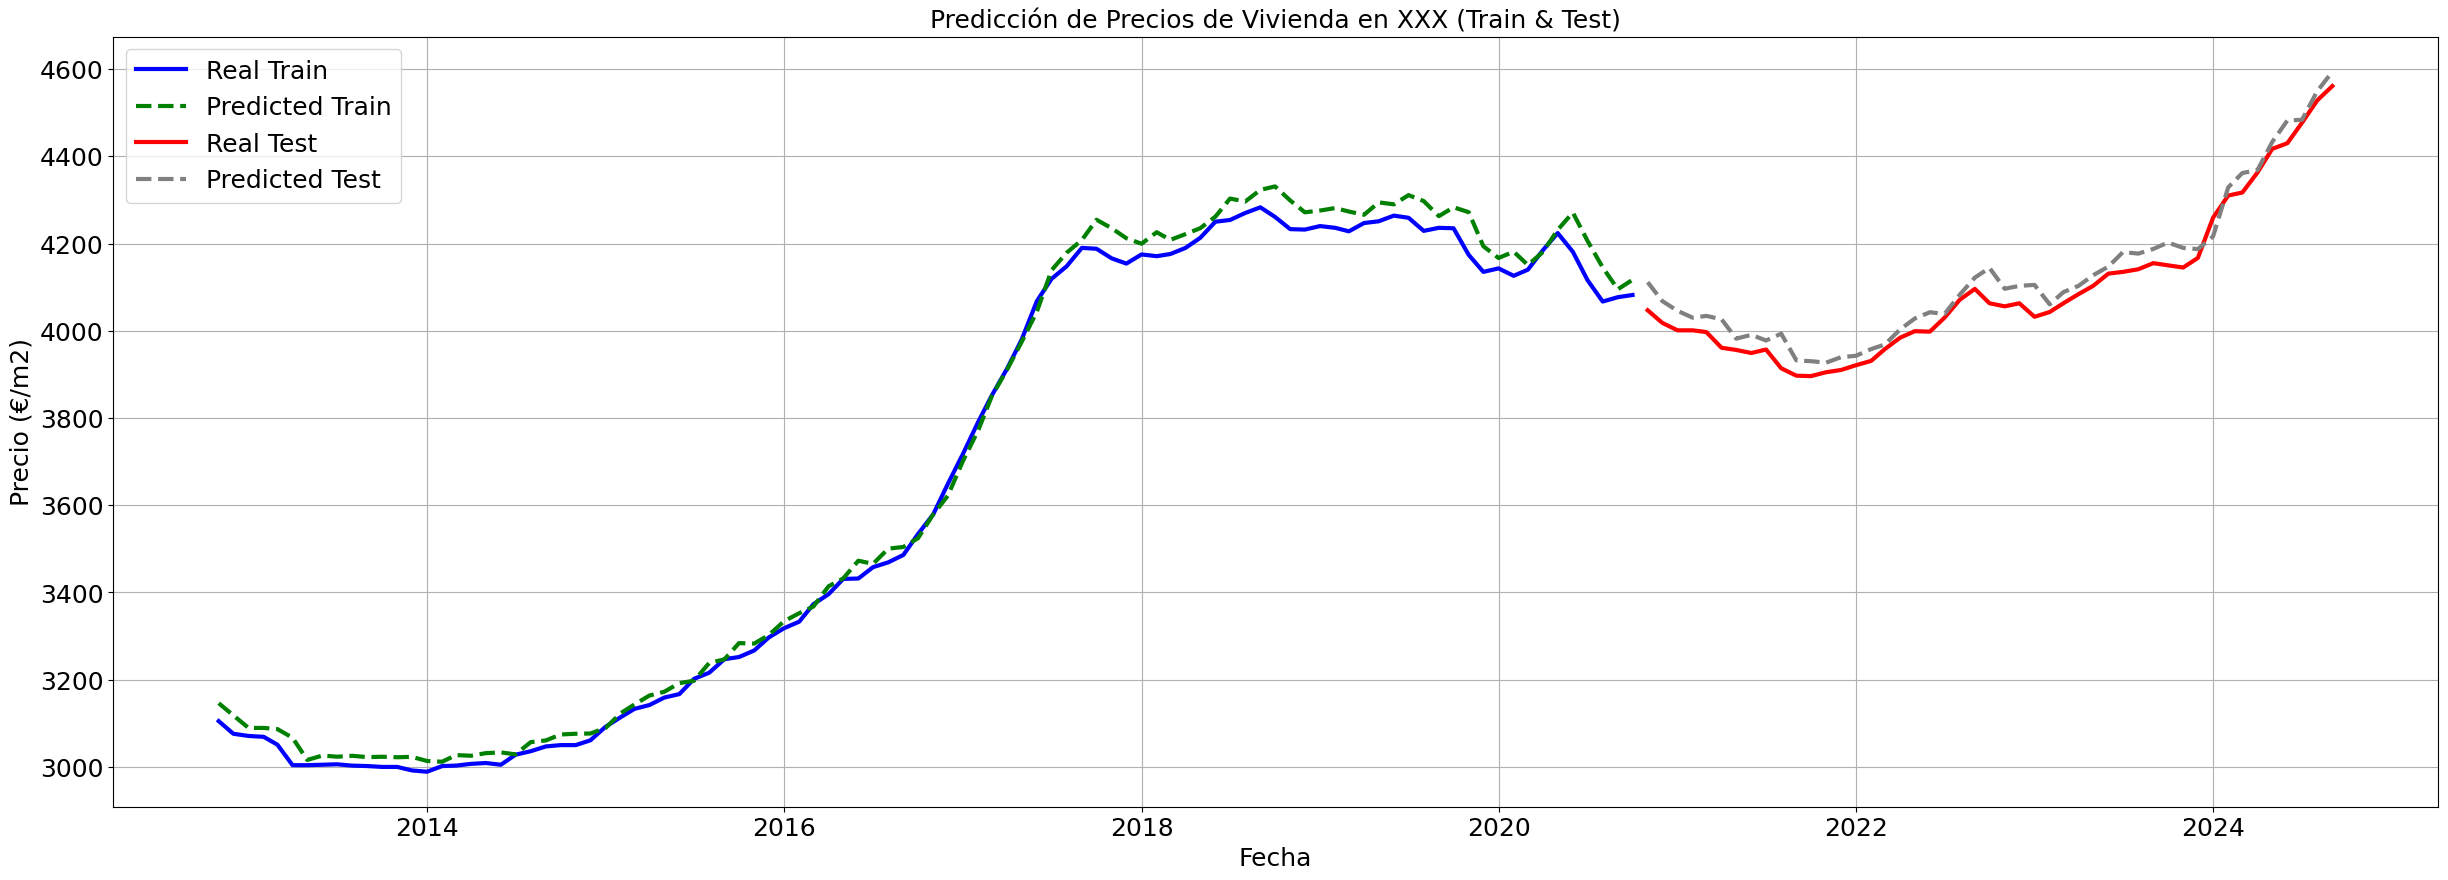

In [20]:
# Graficar los resultados
plt.figure(figsize=(30, 10))

# Datos de entrenamiento
plt.plot(train_dates, y_train_real_ciudad, label="Real Train", color="blue", linewidth=3)
plt.plot(train_dates, y_train_pred_ciudad, label="Predicted Train", color="green", linestyle="dashed", linewidth=3)

# Datos de prueba
plt.plot(test_dates, y_test_real_ciudad, label="Real Test", color="red", linewidth=3)
plt.plot(test_dates, y_test_pred_ciudad, label="Predicted Test", color="gray", linestyle="dashed", linewidth=3)

# Personalización del texto
font_size = 18  # Ajusta el tamaño según tus preferencias

plt.xlabel("Fecha", fontsize=font_size)
plt.ylabel("Precio (€/m2)", fontsize=font_size)
plt.title("Predicción de Precios de Vivienda en XXX (Train & Test)", fontsize=font_size)  # Cambiar XXX por la ciudad elegida
plt.legend(fontsize=font_size)

# Ajustar el tamaño de las etiquetas del eje x e y
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()